# California Housing Price

<b>importing required libraries and functions<b>

In [78]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

# Reading the dataset

In [17]:

df_housing = pd.read_csv("california_housing_train.csv")


df_housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [18]:
# Shape of the dataset
df_housing.shape

(17000, 9)

the dataframe has 9 columns and 17000 rows

In [19]:
# checking the data types
df_housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [20]:
df_housing.median_house_value.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

<b> since the target variable is numeric. this is a regression problem.<b>

# Checking for Missing Values

In [21]:
Total = df_housing.isnull().sum().sort_values(ascending=False) 

Percent = (df_housing.isnull().sum()*100/df_housing.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

missing_data

,Total,Percentage of Missing Values
median_house_value,0,0.0
median_income,0,0.0
households,0,0.0
population,0,0.0
total_bedrooms,0,0.0
total_rooms,0,0.0
housing_median_age,0,0.0
latitude,0,0.0
longitude,0,0.0


In [22]:
df_housing.shape

(17000, 9)

<b> there is no missing values <b>

# checking for outliers

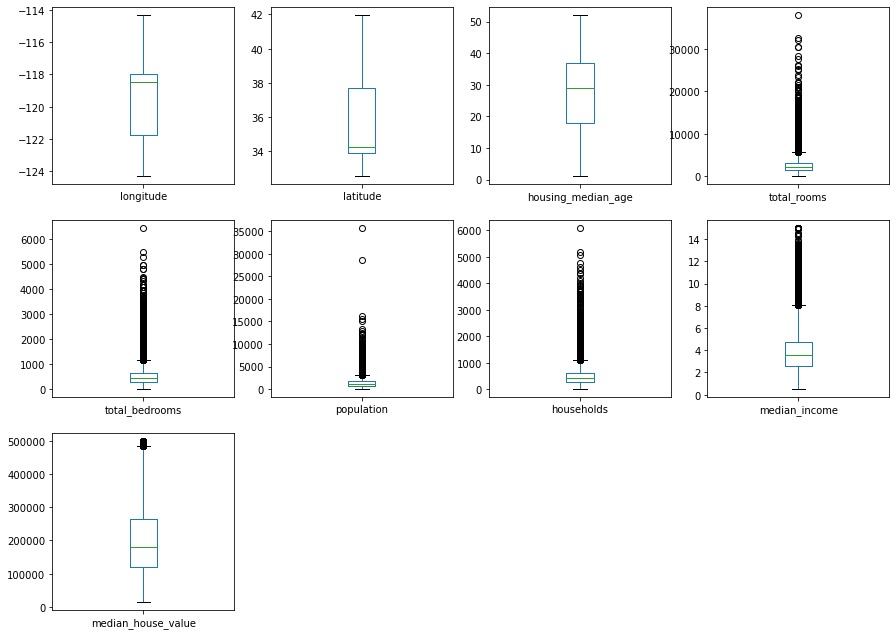

In [23]:
df_housing.plot(kind='box',subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

# using IQR to remove outliers

In [24]:
q1 = df_housing.quantile(0.25)
q3 = df_housing.quantile(0.75)
IQR = q3-q1
df_housing = df_housing[~((df_housing<(q1-1.5*IQR))|(df_housing>(q3+1.5*IQR))).any(axis=1)]
df_housing.shape

(14476, 9)

<AxesSubplot:ylabel='Frequency'>

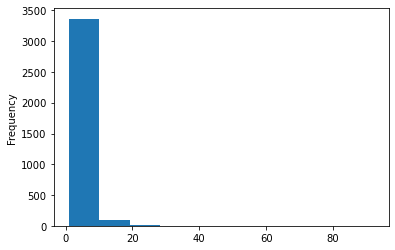

In [31]:
df_housing['median_house_value'].value_counts().plot(kind='hist')

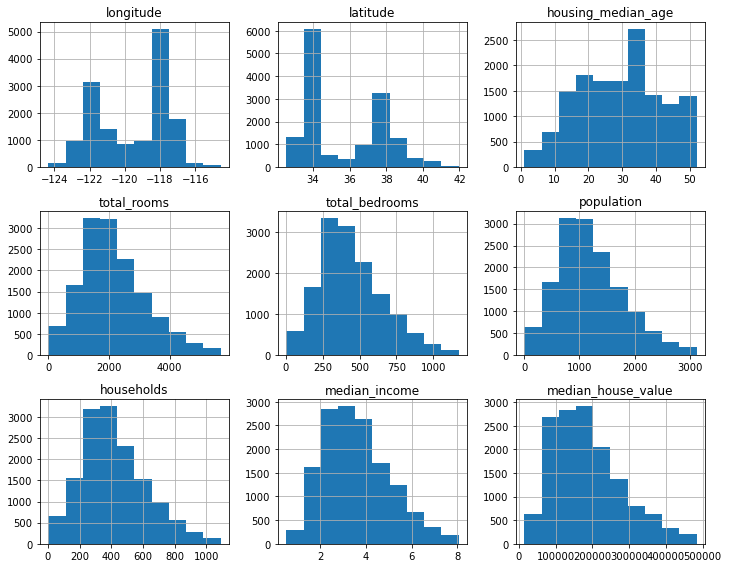

In [32]:
df_housing.hist(figsize=(10,8))
plt.tight_layout()

<b> by observing the plot we could say that features are normally distributed. hence outliers has been removed. <b>

# plotting correlation

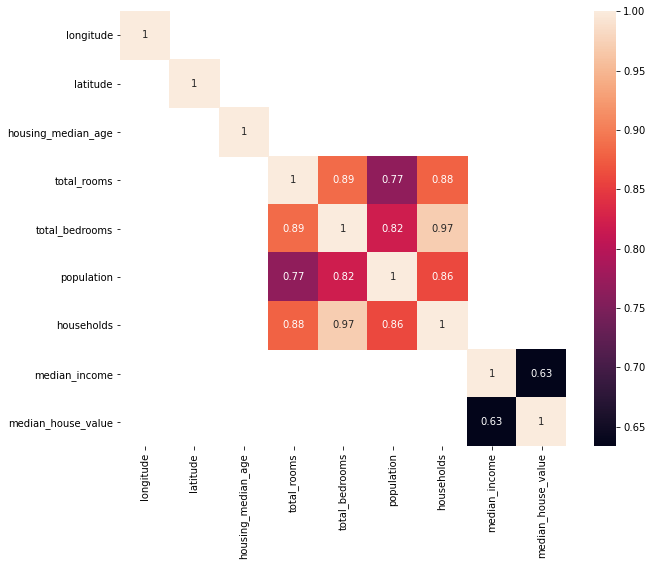

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df_housing.corr()[df_housing.corr()>0.5],annot=True)
plt.show()

<b> total bedrooms, total rooms, population and households are correlated among themselves.  median income and median house value are correlated with each other.<b>

In [35]:
df_housing = df_housing.drop('median_income', axis=1)

In [36]:
num = df_housing.select_dtypes(include=[np.number])
cat = df_housing.select_dtypes(include=[np.object])

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

df_housing_scale = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)

df_housing_scale.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,2.509832,-0.922510,-1.019058,-1.315198,-1.231101,-1.439675,-1.463139,-1.077821
1,2.504850,-0.945558,-1.264661,-0.595662,-0.492429,-1.136676,-0.931626,-1.208322
2,2.504850,-0.977824,-0.773456,-0.638963,-0.542278,-0.955209,-0.756081,-1.292140
3,2.499869,-0.950167,-0.036647,-0.700690,-0.950134,-0.876962,-0.868235,-1.201956
4,2.499869,-0.959386,-0.364117,0.699687,1.061955,1.070892,1.053012,-1.112833


In [44]:
print("Shape of the scaling data",df_housing_scale.shape)


Shape of the scaling data (14476, 8)


In [45]:
df_housing_scale.reset_index(drop=True,inplace=True)

In [47]:
df_final = pd.concat([df_housing_scale],axis=1)

In [48]:
print("Shape of the final model data set", df_final.shape)

Shape of the final model data set (14476, 8)


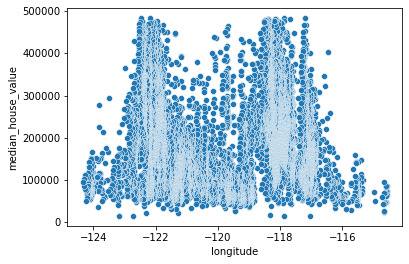

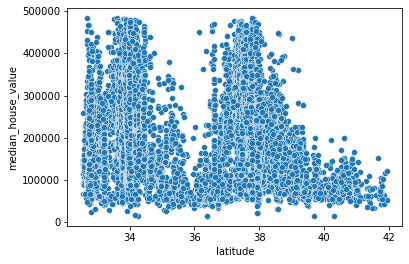

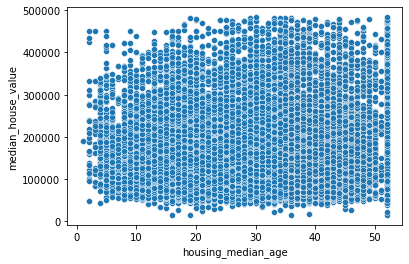

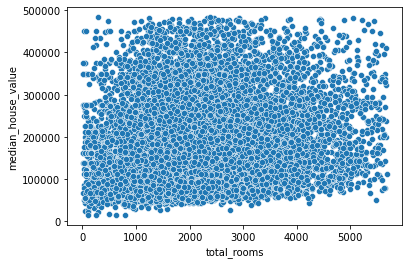

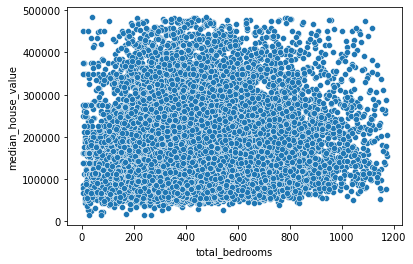

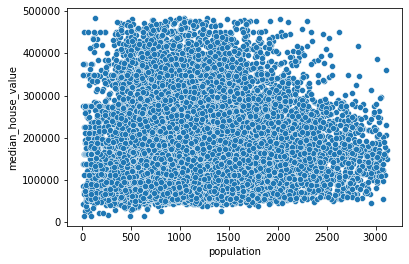

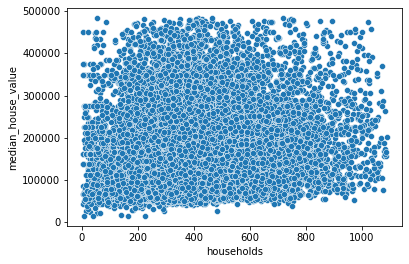

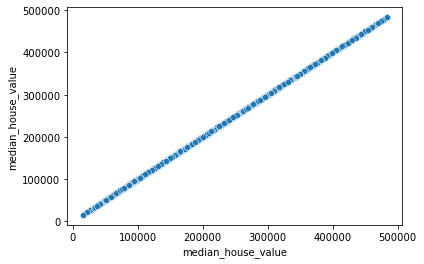

In [52]:
for i in num.columns:
    sns.scatterplot(x=df_housing[i],y=df_housing['median_house_value'])
    plt.show()

# train test spilt

In [54]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = df_final.drop('median_house_value', axis=1)
y = df_final['median_house_value']
X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=10,)

print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (10133, 8)
Shape of the X_test (4343, 8)
Shape of the y_train (10133,)
Shape of the y_test (4343,)


# Model building

In [56]:
model  = sm.OLS(y_train,X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1078.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:46:11   Log-Likelihood:                -11567.
No. Observations:               10133   AIC:                         2.315e+04
Df Residuals:                   10125   BIC:                         2.321e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0040      0

<b> This model explains 42.7% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.997 and indicates that the is no autocorrelation. The Condition Number is 12.9 suggests that there is no collinearity<b>

In [57]:
model.pvalues[model.pvalues<0.05].index.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households']

<b> the p value of variables less than 0.05 are significant features<b>

In [58]:
print("shape of the final data set ",df_final.shape)

shape of the final data set  (14476, 8)


In [59]:
df_numeric_features_vif=df_final.select_dtypes(include=[np.number])

# Checking Multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF=pd.DataFrame()

VIF["VIF Factor"]=[variance_inflation_factor(df_numeric_features_vif.values,i) for i in range(df_numeric_features_vif.shape[1])]

VIF["variables"]=df_numeric_features_vif.columns

VIF.sort_values("VIF Factor",ascending=False).reset_index(drop=True).head(5)

,VIF Factor,variables
0,24.915232,households
1,20.800488,total_bedrooms
2,11.361847,latitude
3,10.665791,longitude
4,6.021545,total_rooms


In [61]:
mulit_coli=VIF[VIF["VIF Factor"]>10]
mulit_coli

,VIF Factor,variables
0,10.665791,longitude
1,11.361847,latitude
4,20.800488,total_bedrooms
6,24.915232,households


<b> we can observe there is a multicollinearity.<b>

In [62]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean square error test data",mean_squared_error(y_test,y_pred_test))
print("Mean absoloute error test data",mean_absolute_error(y_test,y_pred_test))
print("Root mean squared error test data",np.sqrt(mean_squared_error(y_test,y_pred_test)))

print("Mean square error train data",mean_squared_error(y_train,y_pred_train))
print("Mean absoloute error train data",mean_absolute_error(y_train,y_pred_train))
print("Root mean squared error train data",np.sqrt(mean_squared_error(y_train,y_pred_train)))

Mean square error test data 0.5829235041727936
Mean absoloute error test data 0.5878657600605095
Root mean squared error test data 0.7634942725212768
Mean square error train data 0.5741624964832233
Mean absoloute error train data 0.5848434868155519
Root mean squared error train data 0.7577351097073589


In [63]:
from sklearn.feature_selection import RFE

In [64]:
for ind in range(len(df_numeric_features_vif.columns)):

    vif = pd.DataFrame()

    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    vif["Features"] = df_numeric_features_vif.columns

    multi = vif[vif['VIF_Factor'] > 8]

    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
 
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor            Features
0    1.052352           longitude
1    1.159138  housing_median_age
2    5.562716         total_rooms
3    6.055118      total_bedrooms
4    3.376413          population
5    1.157534  median_house_value


In [65]:
print("Shape of the data after mulitcolinearity removal ",df_numeric_features_vif.shape)

Shape of the data after mulitcolinearity removal  (14476, 6)


In [67]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X=df_final[['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households']]
X=sm.add_constant(X)
y=df_final["median_house_value"]

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10, test_size=0.3)

print("Shape of the X_train ",X_train.shape)
print("Shape of the X_test ",X_test.shape)
print("Shape of the y_train ",y_train.shape)
print("Shape of the y_test ",y_test.shape)

Shape of the X_train  (10133, 8)
Shape of the X_test  (4343, 8)
Shape of the y_train  (10133,)
Shape of the y_test  (4343,)


In [68]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1078.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:47:08   Log-Likelihood:                -11567.
No. Observations:               10133   AIC:                         2.315e+04
Df Residuals:                   10125   BIC:                         2.321e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0040      0

<b> there is no change is the r2 and adj r2 value<b>

In [69]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean square error test data",mean_squared_error(y_test,y_pred_test))
print("Mean absoloute error test data",mean_absolute_error(y_test,y_pred_test))
print("Root mean squared error test data",np.sqrt(mean_squared_error(y_test,y_pred_test)))

Mean square error test data 0.5829235041727936
Mean absoloute error test data 0.5878657600605095
Root mean squared error test data 0.7634942725212768


In [71]:
print("Mean square error train data",mean_squared_error(y_train,y_pred_train))
print("Mean absoloute error train data",mean_absolute_error(y_train,y_pred_train))
print("Root mean squared error train data",np.sqrt(mean_squared_error(y_train,y_pred_train)))

Mean square error train data 0.5741624964832233
Mean absoloute error train data 0.5848434868155519
Root mean squared error train data 0.7577351097073589


# Conclusion and Intrepretation

<b> Conclusion:
    
    * the values of r square and adjusted r square is same and it is good fit to a model.
    * RMSE value is near to zero. hence error is less. <b>